---
<h1 style="text-align: center;">Análise Estatística dos Retornos Diários do Índice Ibovespa:</h1>
<h2 style="text-align: center;">Comparação entre Distribuições Normal e t de Student</h2>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 30/07/2024

---
---

# Introdução

O objetivo deste trabalho é analisar a distribuição dos retornos do Ibovespa. Para o cálculo dos retornos, utilizaremos o preço de fechamento ajustado diário no período de 27 de abril de 2020 a 30 de julho de 2024. Os dados serão obtidos a partir do Yahoo Finance. Para acessar o banco de dados, [clique aqui](https://finance.yahoo.com/quote/%5EBVSP/history/?period1=1587945600&period2=1722297600).

Neste estudo, será plotado o histograma dos retornos diários do Ibovespa para verificar graficamente qual distribuição de probabilidade melhor se ajusta aos dados. Com base na análise gráfica, será possível gerar valores aleatórios dos retornos para simulações futuras. Além disso, realizaremos três testes de Kolmogorov-Smirnov para dados contínuos, com as seguintes hipóteses nulas:

    1. H0: Retorno segue uma distribuição Normal;
    2. H0: Retorno segue uma distribuição T-studante com (n - 1) graus de liberdade;
    3. H0: Retorno segue uma distribuição T-studante com (n - 2) graus de liberdade.

# Metodologia

Os dados foram obtidos através da biblioteca yfinance, focando nos preços de fechamento ajustados do índice Ibovespa. Após a obtenção dos dados, foram calculados os retornos diários, que foram então ordenados para posterior análise.

## Análise Gráfica

Foi plotado o histograma dos retornos diários do Ibovespa com o objetivo de identificar visualmente a distribuição dos dados. Além disso, geramos valores aleatórios dos retornos para comparação com a distribuição empírica observada.

## Testes de Kolmogorov-Smirnov

Foram realizados três testes de Kolmogorov-Smirnov para avaliar se os retornos diários seguem uma distribuição Normal, uma distribuição T-studante com (n - 1) graus de liberdade e uma distribuição T-studante com (n - 2) graus de liberdade (gl). Estes testes permitem verificar a aderência das distribuições teóricas aos dados empíricos.

## Resultados Esperados

Através desta análise, esperamos identificar a distribuição que melhor descreve os retornos do Ibovespa, o que poderá auxiliar na modelagem de previsões e na tomada de decisões de investimento.

## Biblioteca utilizadas
1) yfinance: Para obtenção dos dados financeiros.

2) numpy: Para cálculos estatísticos.

3) matplotlib e seaborn: Para criação de gráficos.

4) scipy: Para realização dos testes estatísticos.

5) warnings: Para remoção de avisos.

In [59]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import t, norm, uniform


In [60]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")

## Obtenção dos Dados

In [61]:
# Obtendo os dados na COGN3 pelo Yahoo Finance
data = yf.download("^BVSP", start="2020-04-27", end="2024-07-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed

## Cálculo dos Retornos

In [62]:
# Criando uma variável que contêm os retornos
ret = data.pct_change().dropna()

# Ordenar os retornos
ret_sort = np.sort(ret)


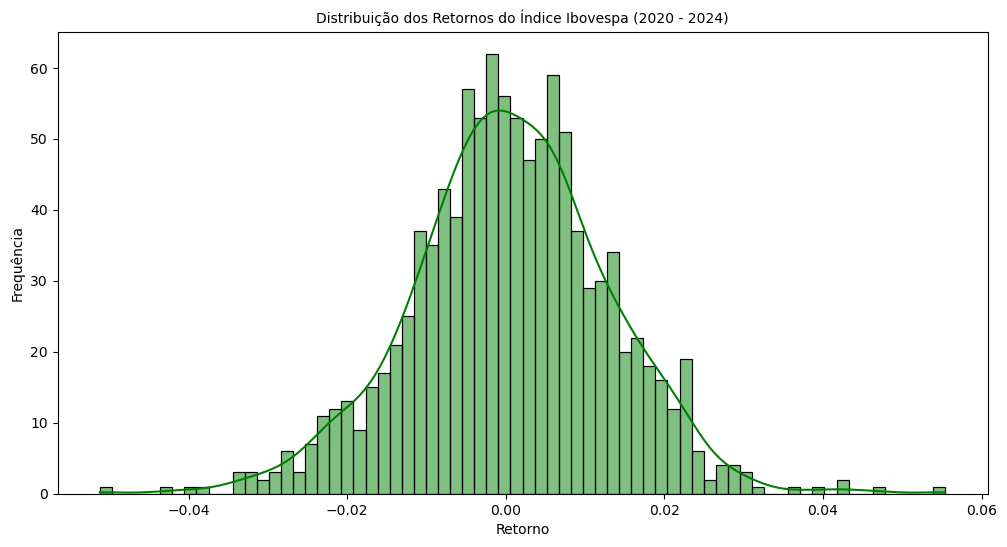

In [63]:
# Plotando o histograma dos retornos
plt.figure(figsize=(12,6))
sns.histplot(ret, kde=True, bins=70, color='green')
plt.title("Distribuição dos Retornos do Índice Ibovespa (2020 - 2024)", fontsize=10)
plt.xlabel("Retorno")
plt.ylabel("Frequência")
plt.show()

Podemos observar no histograma que os retornos diários do Ibovespa apresentam uma forma que se aproxima de uma distribuição normal, porém com caudas ligeiramente mais pesadas. Isso indica que os retornos extremos, tanto positivos quanto negativos, ocorrem com maior frequência do que o esperado em uma distribuição normal. Essa característica sugere que a distribuição dos retornos do Ibovespa pode ser melhor modelada por uma distribuição t de Student, que é conhecida por capturar melhor a frequência de eventos extremos devido às suas caudas mais pesadas.

Com base nesta observação, vamos gerar empiricamente a função de probabilidade acumulada (ECDF) dos retornos. Em seguida, geraremos valores aleatórios considerando que os retornos seguem uma distribuição normal, utilizando a média e o desvio padrão amostral dos dados observados. Isso nos permitirá comparar a distribuição empírica dos retornos com a distribuição teórica normal e avaliar a adequação de cada modelo.

In [64]:
# Número de amostras desejadas
n = len(ret)

# Médidas dos retornos
media_ret = ret.mean()
dp_ret = ret.std()

## Geração de Valores Aleatórios

No código abaixo, estamos gerando uma amostra aleatória com a mesma quantidade de observações dos retornos, totalizando 1059 observações. Assumimos que \( X \) segue uma distribuição normal com média **$\mu = 0.00053$** e variância **$\sigma^2 = 0.0125^2$**.

In [65]:
# Gerando valores aleatorios
X = []
for i in range(n):
  X.append(dp_ret * np.sqrt(12 / 100000) * (np.random.uniform(0, 1, 100000).sum() - 100000 / 2) + media_ret)
X = np.array(X)
X_sort = np.sort(X)

In [90]:
print("μ_{ret} = ", media_ret, "\nσ_{ret} = ", dp_ret, '\n')
print("μ_{X} = ", X.mean(), "\nσ_{X} = ", X.std())

μ_{ret} =  0.0005352541442946981 
σ_{ret} =  0.012500951090858341 

μ_{X} =  0.00034609229977199503 
σ_{X} =  0.012352303813962724


Podemos ver acima que tanto a média quanto o desvio padrão dos retornos são bastante próximos dos valores da amostra aleatória.

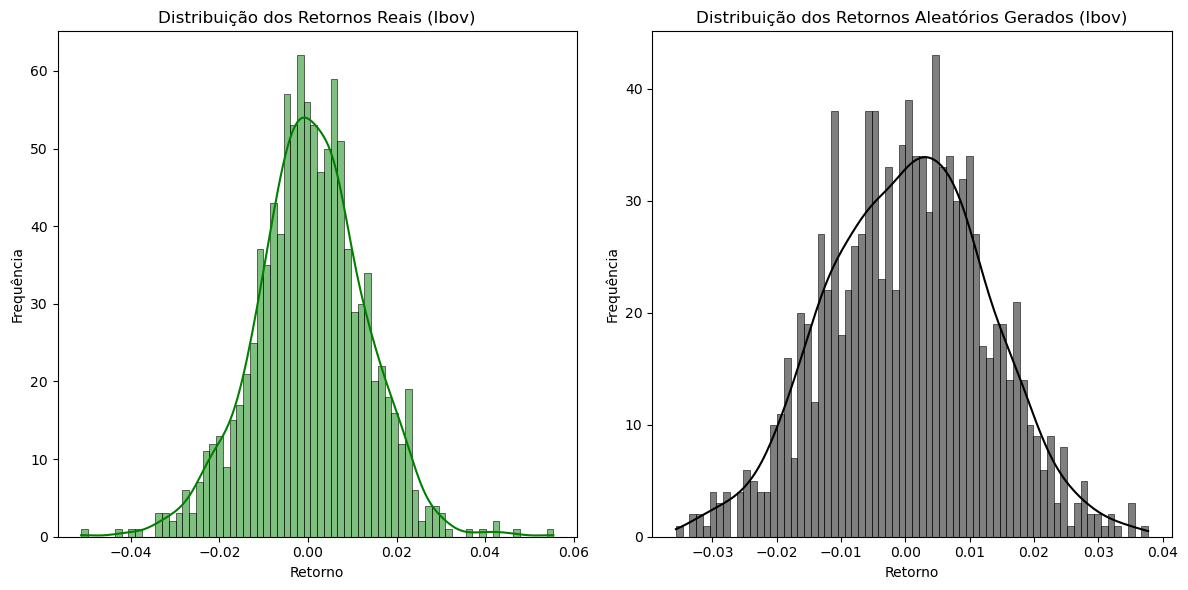

In [68]:
# Plotando os histogramas para comparação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ret, kde=True, bins=70, color='green')
plt.title('Distribuição dos Retornos Reais (Ibov)')
plt.xlabel('Retorno')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(X, kde=True, bins=70, color='black')
plt.title('Distribuição dos Retornos Aleatórios Gerados (Ibov)')
plt.xlabel('Retorno')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

No histograma acima, em verde estão os retornos reais do Ibovespa, enquanto em preto estão os retornos aleatórios, assumindo que os dados seguem uma distribuição normal.

## Função Empírica de Probabilidade Acumulada 

In [67]:
# Calcular a ECDF manualmente
Fn = np.arange(1, n + 1) / n

Para gerar a ECDF (Função de Distribuição Acumulada) dos retornos reais, assumimos que a probabilidade de cada valor é de \( \frac{1}{n} \). Assim, a probabilidade acumulada é dada por: 

- $\text{ret}_1 = \frac{1}{n}$
  
- $\text{ret}_2 = \frac{2}{n}$
  
- $\text{ret}_n = 1$

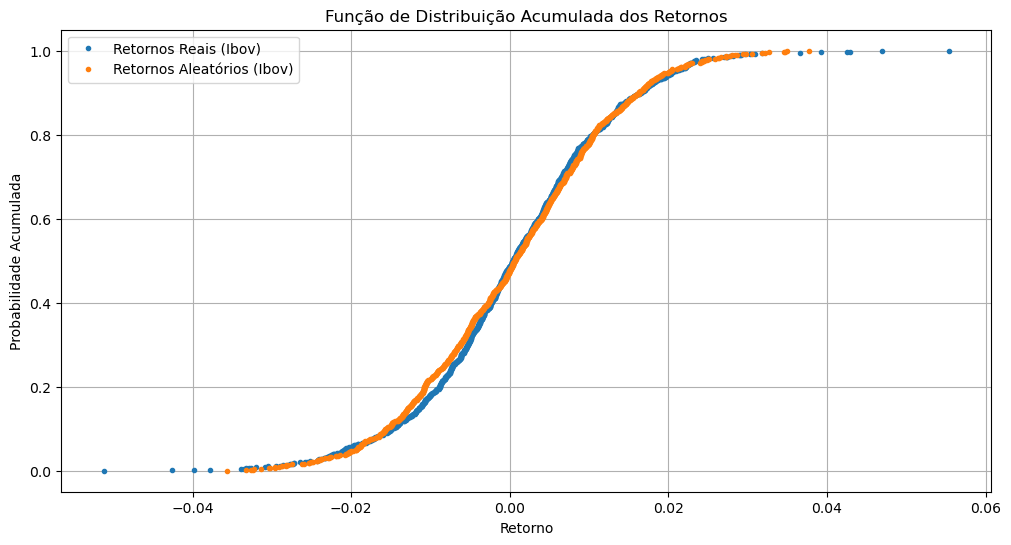

In [91]:
# Plotar a ECDF
plt.figure(figsize=(12, 6))
plt.plot(ret_sort, Fn, marker='.', linestyle='none', label='Retornos Reais (Ibov)')
plt.plot(X_sort, Fn, marker='.', linestyle='none', label='Retornos Aleatórios (Ibov)')
plt.title('Função de Distribuição Acumulada dos Retornos')
plt.xlabel('Retorno')
plt.ylabel('Probabilidade Acumulada')
plt.grid(True)
plt.legend()
plt.show()

No gráfico da função de distribuição acumulada dos valores reais e dos aleatórios, podemos observar que as curvas se aproximam bastante. Portanto, graficamente, podemos afirmar com maior confiança que os dados se ajustam a uma distribuição normal.

## Testes de Kolmogorov-Smirnov para Distribuição Normal

No código abaixo, realizaremos o teste de Kolmogorov-Smirnov para verificar a probabilidade de que os valores reais se aproximam da distribuição normal.

In [70]:
dados_norm = np.sort(np.random.normal(0, 1, n))
Fn_norm = norm.cdf(dados_norm)

In [71]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [72]:
# Preencher D_1 e D_2
for i in range(n):
    D1[i] = 1 / n - Fn_norm[i]
    D2[i] = Fn_norm[i] - (i - 1) / n

# Calcular D_calc
D_calc = np.max(np.maximum(D1, D2))

In [73]:
# Simulação do p-valor
alpha = 0.05  # nível de significância
n_rep = 10000

In [74]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [75]:

contador = 0
for _ in range(n_rep):
    aux = np.sort(np.random.uniform(0, 1, n))
    for j in range(len(aux)):
        D1[j] = j/n - uniform.cdf(aux[j])
        D2[j] = uniform.cdf(aux[j]) - (j - 1) / n
    D = np.max(np.maximum(D1, D2))
    if D >= D_calc:
        contador += 1

pvalor = contador / n_rep

if pvalor < alpha:
    print("Rejeite H_0")
else:
    print("Não rejeite H_0")

print(f'Estatística do teste D: {D_calc}')
print(f'Valor-p: {pvalor}')

Não rejeite H_0
Estatística do teste D: 0.02931270986463419
Valor-p: 0.3253


O teste de Kolmogorov-Smirnov foi aplicado para avaliar se os valores reais seguem uma distribuição normal. A estatística do teste, $D$, é 0.0293, que representa a maior diferença absoluta entre a função de distribuição acumulada empírica (ECDF) dos dados reais e a função de distribuição acumulada teórica da normal. 

O valor-p obtido é 0.3253. Este valor-p indica a probabilidade de observar uma estatística de teste tão extrema quanto a observada, assumindo que a hipótese nula $H_0$ (de que os dados seguem uma distribuição normal) é verdadeira. 

Como o valor-p é significativamente maior do que o nível de significância comum de 0.05, não rejeitamos a hipótese nula. Isso sugere que não há evidências suficientes para concluir que os dados reais diferem da distribuição normal. Portanto, com base neste teste, os dados podem ser considerados como seguindo uma distribuição normal, de acordo com o critério estabelecido.

## Testes de Kolmogorov-Smirnov para T-studante com (n - 1) gl

No código abaixo, realizaremos o teste de Kolmogorov-Smirnov para verificar a probabilidade de que os valores reais se aproximam da distribuição t de studante com $(n - 1)$ grau de liberdade.

In [82]:
dados_ts1 = np.sort(t.rvs(n - 1, size=n))
Fn_ts1 = t.cdf(dados_ts1, n - 1)

In [83]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [84]:
# Preencher D_1 e D_2
for i in range(n):
    D1[i] = 1 / n - Fn_norm[i]
    D2[i] = Fn_norm[i] - (i - 1) / n

# Calcular D_calc
D_calc = np.max(np.maximum(D1, D2))

In [85]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [86]:

contador = 0
for _ in range(n_rep):
    aux = np.sort(np.random.uniform(0, 1, n))
    for j in range(len(aux)):
        D1[j] = j/n - uniform.cdf(aux[j])
        D2[j] = uniform.cdf(aux[j]) - (j - 1) / n
    D = np.max(np.maximum(D1, D2))
    if D >= D_calc:
        contador += 1

pvalor = contador / n_rep

if pvalor < alpha:
    print("Rejeite H_0")
else:
    print("Não rejeite H_0")

print(f'Estatística do teste D: {D_calc}')
print(f'Valor-p: {pvalor}')

Não rejeite H_0
Estatística do teste D: 0.02931270986463419
Valor-p: 0.3254


Com base nos resultados do teste de Kolmogorov-Smirnov acima, não rejeitamos a hipótese nula $(H_0)$. A grande quantidade de observações na amostra faz com que a distribuição t de Student com $(n - 1)$ graus de liberdade se aproxime muito da distribuição normal. Esta aproximação é evidente no teste de Kolmogorov-Smirnov, que avalia a adequação dos dados à distribuição normal.

O valor-p de 0.3254 sugere que a diferença entre a distribuição dos dados reais e a distribuição t de studant é muito pequena. Além disso, a estatística $(D)$ do teste permaneceu a mesma, indicando que a discrepância entre as distribuições não é significativa. Portanto, os dados podem ser considerados como seguindo uma distribuição t de studant, de acordo com o teste realizado.

## Testes de Kolmogorov-Smirnov para T-studante com (n - 2) gl

No código abaixo, realizaremos o teste de Kolmogorov-Smirnov para verificar a probabilidade de que os valores reais se aproximam da distribuição t de studante com $(n - 2)$ grau de liberdade.

In [77]:
dados_ts2 = np.sort(t.rvs(n - 2, size=n))
Fn_ts2 = t.cdf(dados_ts2, n - 2)

In [78]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [79]:
# Preencher D_1 e D_2
for i in range(n):
    D1[i] = 1 / n - Fn_norm[i]
    D2[i] = Fn_norm[i] - (i - 1) / n

# Calcular D_calc
D_calc = np.max(np.maximum(D1, D2))

In [80]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [81]:

contador = 0
for _ in range(n_rep):
    aux = np.sort(np.random.uniform(0, 1, n))
    for j in range(len(aux)):
        D1[j] = j/n - uniform.cdf(aux[j])
        D2[j] = uniform.cdf(aux[j]) - (j - 1) / n
    D = np.max(np.maximum(D1, D2))
    if D >= D_calc:
        contador += 1

pvalor = contador / n_rep

if pvalor < alpha:
    print("Rejeite H_0")
else:
    print("Não rejeite H_0")

print(f'Estatística do teste D: {D_calc}')
print(f'Valor-p: {pvalor}')

Não rejeite H_0
Estatística do teste D: 0.02931270986463419
Valor-p: 0.3171


Os resultados indicam que não rejeitamos a hipótese nula $(H_0)$. Isso sugere que, com um nível de confiança de 95%, os retornos diários do índice Ibovespa podem ser bem representados por uma distribuição t de Student com $(n - 2)$ graus de liberdade. 

O valor-p de 0.3171 e a estatística $(D)$ baixa indicam que a discrepância entre os dados reais e a distribuição t é insignificante. Portanto, além de poderem ser descritos por uma distribuição normal, os dados também se ajustam adequadamente a uma distribuição t com $(n - 2)$ graus de liberdade.

# Conclusão

Com base neste estudo, podemos afirmar com 95% de confiança que os retornos diários do índice Ibovespa podem ser modelados utilizando a distribuição normal, ou as distribuições t de Student com $(n - 1)$ ou $(n - 2)$ graus de liberdade.

No entanto, para a geração de valores aleatórios, optou-se por utilizar uma distribuição normal devido à sua simplicidade na geração da amostra. Em contraste, no setor financeiro, é comum modelar dados de retornos com uma distribuição t de Student, pois esta distribuição melhor captura a ocorrência de eventos extremos, como grandes variações de preço em um único dia, que são frequentes em dados financeiros.